In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from ebm.probability import log_distributions, fit_distributions, predict_stage
from ebm.mcmc import greedy_ascent, mcmc, get_optimal_order

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv(folder / 'ENIGMA-PD-regional.csv')

In [2]:
folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')
data = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)

train, test = train_test_split(data, stratify=data['cohort'], test_size=0.1, random_state=777)
X_train = train.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_train = train['Dx'].values
X_test = test.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_test = test['Dx'].values

train_log_p_e, train_log_p_not_e = log_distributions(X_train, y_train)
test_log_p_e, test_log_p_not_e = log_distributions(X_train, y_train, X_test=X_test, y_test=y_test)

In [3]:
all_orders = np.load('../logs/order_mcmc.npy')
order_map, best_order = get_optimal_order(all_orders)

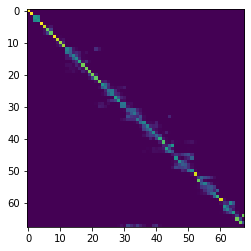

In [4]:
plt.imshow(order_map[best_order]);

In [44]:
probas = predict_stage(best_order,test_log_p_e, test_log_p_not_e).T
stage = np.argmax(probas, axis=1)
test['pred_stage'] = stage

In [49]:
sub = pd.merge(left=df[['SubjID', 'site', 'cohort', 'HY1234']], right=test, on='SubjID', how='right')

In [52]:
sub.groupby('HY1234')['pred_stage'].agg(['mean', 'count'])

,mean,count
HY1234,,
0.0,38.333333,69
1.0,44.166667,24
2.0,40.540984,61
3.0,53.666667,9
4.0,36.750000,4


In [53]:
probas = predict_stage(best_order,train_log_p_e, train_log_p_not_e).T
stage = np.argmax(probas, axis=1)
train['pred_stage'] = stage

/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
sub = pd.merge(left=df[['SubjID', 'site', 'cohort', 'HY1234']], right=train, on='SubjID', how='right')

In [62]:
sub.groupby(['site','HY1234'])['pred_stage'].agg(['mean', 'std', 'count'])

mean        std  count
site     HY1234                             
Bern     0.0     41.261905  18.058252     42
         1.0     64.000000        NaN      1
         2.0     42.357143  19.077200     14
         3.0     48.100000  17.841587     10
         4.0     42.250000  17.114808      4
CGU      0.0     40.806723  19.633195    119
         1.0     36.925000  20.727026     40
         2.0     34.666667  18.976282     48
         3.0     39.629630  19.533301     27
         4.0     30.428571  21.317073     14
FSL      0.0     37.514286  17.650815     35
         1.0     36.000000  17.343587      6
         2.0     45.772727  18.526511     22
         3.0     34.500000  17.677670      2
GRAZ     0.0     35.922078  19.156397     77
         1.0     31.900000  23.316422     10
         2.0     41.245614  21.278158     57
         3.0     23.000000  24.010414      5
Liege1   0.0     34.588235  20.423818     17
         1.0     31.000000  43.840620      2
         2.0     32.800000  21.353116     10
         3.0     62.000000   1.414214      2
Liege2   0.0     29.277778  21.059595     18
         1.0     35.750000  20.892582      8
         2.0     23.375000  19.390259      8
         3.0     27.000000        NaN      1
Milan    0.0     24.700000  17.198514     10
         2.0     45.842105  20.369539     19
         3.0     47.750000  23.739910      4
Neurocon 0.0     39.875000  18.627457      8
...                    ...        ...    ...
PPMI     2.0     41.350877  19.449040    114
         3.0     41.000000   1.414214      2
Penn     0.0     37.777778  19.961073      9
         1.0     52.500000   4.949747      2
         2.0     42.357143  23.437666     14
         3.0     44.791667  19.110614     24
Stanford 0.0     36.625000  20.832238      8
         2.0     44.454545  17.276363     11
         3.0     49.750000  19.989581      4
         4.0     22.000000        NaN      1
TaoWu    0.0     40.500000  18.299102      8
         1.0      4.000000   1.414214      2
         2.0     46.875000  22.433632      8
         3.0     45.000000        NaN      1
UNICAMP  0.0     34.805825  16.802228    103
         1.0     30.666667  18.249899     18
         2.0     23.590909  15.469352     22
         3.0     25.937500  17.811864     16
         4.0     44.200000  13.141537      5
UOMmain  0.0     39.666667  21.279322     15
         2.0     45.500000  16.663333      4
         3.0     52.666667   7.571878      3
         4.0     55.333333  16.743158      3
UOMpilot 0.0     17.250000  10.874282      4
         2.0     35.666667  19.347696      3
Udal     1.0     58.000000        NaN      1
         2.0     35.809524  20.587907     21
VUMC1    0.0     43.076923  17.917417     26
VUMC2    2.0     41.470588  19.602671     17
         3.0     60.500000   7.778175      2

[74 rows x 3 columns]

In [57]:
best_order

array([43,  9,  6, 40, 61, 27, 23, 57, 29, 15, 22, 56, 36,  2, 60, 26, 25,
       20, 54, 63, 18, 16, 62, 28, 34, 13, 47, 41,  7, 59, 51, 52, 50, 44,
        0, 11, 32, 53,  3, 37, 45, 67, 49, 39, 66, 64, 17, 46, 12, 10, 30,
       33, 21, 55, 24, 42, 58,  8, 35,  4, 38, 31, 65, 48, 14,  1, 19,  5])